# Data Visualisierung

## Katakana Schriftzeichen

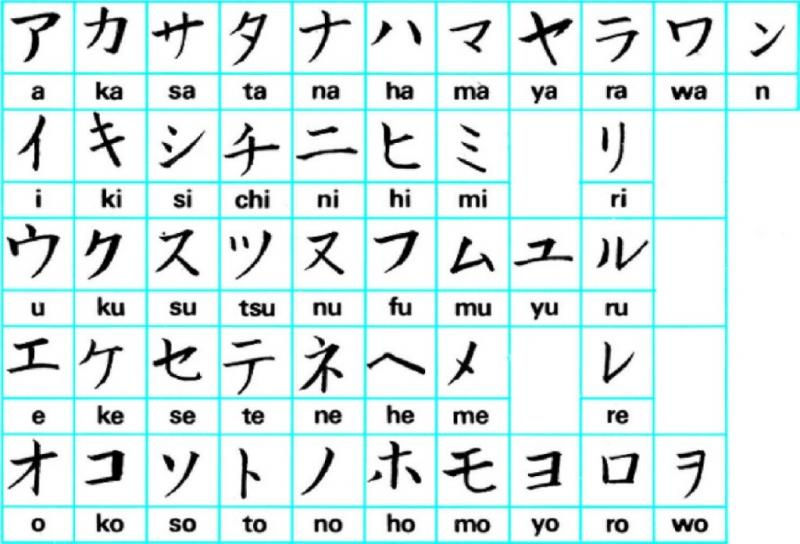

In [1]:
from IPython.display import Image
Image(filename="data/signs.jpg", width=500)

## Plot einer exemplarischen Datei

Buchstabe: a
Ground Truth: 88470
Abtastrate: 0.02 [s]
Dauer Zeichnen: 3.6 [s]


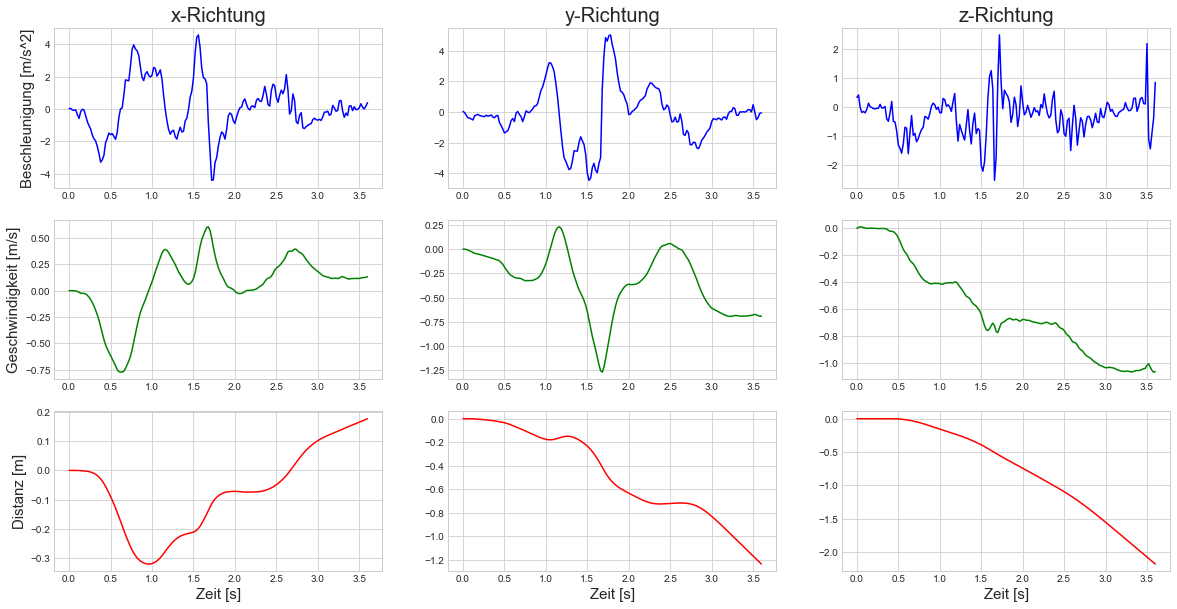

In [2]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
%matplotlib inline

# Listen für Beschleunigungswerte
x_acc = []
y_acc = []
z_acc = []

# Import der Datei
with open("data/test/a__88470.csv", newline="") as csvdatei:
    # Einlesen der Zeilen als String in Liste
    csv_reader_object = csv.reader(csvdatei, delimiter=",")
    
    # Buchstabe und Ground Truth
    b, gt = csvdatei.name.split("__")
    # Buchstabe = letztes Zeichen
    b = b[-1]
    print("Buchstabe: {}".format(b))
    # Groung Truth ohne ".csv" als Integer
    gt = int(gt[0:-4])
    print("Ground Truth: {}".format(gt))
    
    # Listen mit Beschleunigungswerte füllen
    for row in csv_reader_object:
        kal, x, y, z = row[0].split(";")
        # Bei kal = 1 --> Kalibierung abgeschlossen
        if kal == "1":
            x_acc.append(float(x))
            y_acc.append(float(y))
            z_acc.append(float(z))
            
# Erzeugung von numpy-arrays aus Listen
x_acc = np.array(x_acc)
y_acc = np.array(y_acc)
z_acc = np.array(z_acc)

# Abtastrate = 50 Hz
dt = 1/50
print("Abtastrate: {} [s]".format(dt))

# Anzahl der Sekunden = Anzahl Werte/ 50
sek = (len(x_acc)-1) * dt
print("Dauer Zeichnen: {} [s]".format(sek))

# Zeitliste
t = np.arange(0,len(x_acc),1) * dt

# Integration der Beschleunigungswerte mit Trapezregel
#     Anfangswerte von Geschwindigkeit & Weg = 0
# x-Werte
x_velo = integrate.cumtrapz(x_acc, t, initial=0)
x_dist = integrate.cumtrapz(x_velo, t, initial=0)
# y-Werte
y_velo = integrate.cumtrapz(y_acc, t, initial=0)
y_dist = integrate.cumtrapz(y_velo, t, initial=0)
# z-Werte
z_velo = integrate.cumtrapz(z_acc, t, initial=0)
z_dist = integrate.cumtrapz(z_velo, t, initial=0)

# Sammeln der arrays in einer Liste zum vereinfachten Plotten
list = [x_acc, y_acc, z_acc, x_velo, y_velo, z_velo, x_dist, y_dist, z_dist]

# Sammeln der Farben in einer Liste
farbe = ["blue", "green", "red"]


# Erstellung der Figure zum Plotten der einzelnen Werte
mpl.style.use("seaborn-whitegrid")
fig, axs = plt.subplots(3,3,figsize=(20,10))

# Zähler initalisieren
a = 0

# Plotten der Beschleunigungs-/ Geschwindigkeits- & Distanzwerte
for i in range(0,3):
    for j in range(0,3):
        axs[i,j].plot(t,list[a], color=farbe[i])
        a += 1

# Angleichen der y-Achswerte?
        
# Setzen von "Schönheitsparametern"
axs[0,0].set_ylabel("Beschleunigung [m/s^2]", fontsize=15)
axs[1,0].set_ylabel("Geschwindigkeit [m/s]", fontsize=15)
axs[2,0].set_ylabel("Distanz [m]", fontsize=15)

axs[2,0].set_xlabel("Zeit [s]", fontsize=15)
axs[2,1].set_xlabel("Zeit [s]", fontsize=15)
axs[2,2].set_xlabel("Zeit [s]", fontsize=15)

axs[0,0].set_title("x-Richtung", fontsize=20)
axs[0,1].set_title("y-Richtung", fontsize=20)
axs[0,2].set_title("z-Richtung", fontsize=20)

# Anzeige des Plots
plt.show()        

### 3D-Plot des "Smartphone-Verfahrweg"

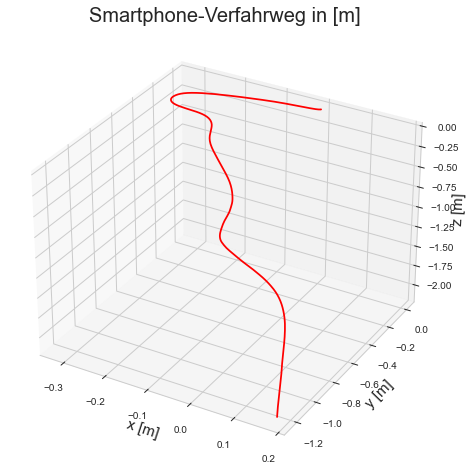

In [6]:
# Erstellung der Figure zur Ausgabe des Smartphone-Verfahrweges in 3D
mpl.style.use("seaborn-whitegrid")
fig2 = plt.figure(figsize=(10,8))
axs2 = fig2.gca(projection='3d')

# Erzeugung des Plots
axs2.plot(x_dist, y_dist, z_dist, color="red")

# Bezeichnungen
axs2.set_title("Smartphone-Verfahrweg in [m]", fontsize=20)
axs2.set_xlabel("x [m]", fontsize=15)
axs2.set_ylabel("y [m]", fontsize=15)
axs2.set_zlabel("z [m]", fontsize=15)

# Plot anzeigen
plt.show()

### Exkurs: Trapezregel

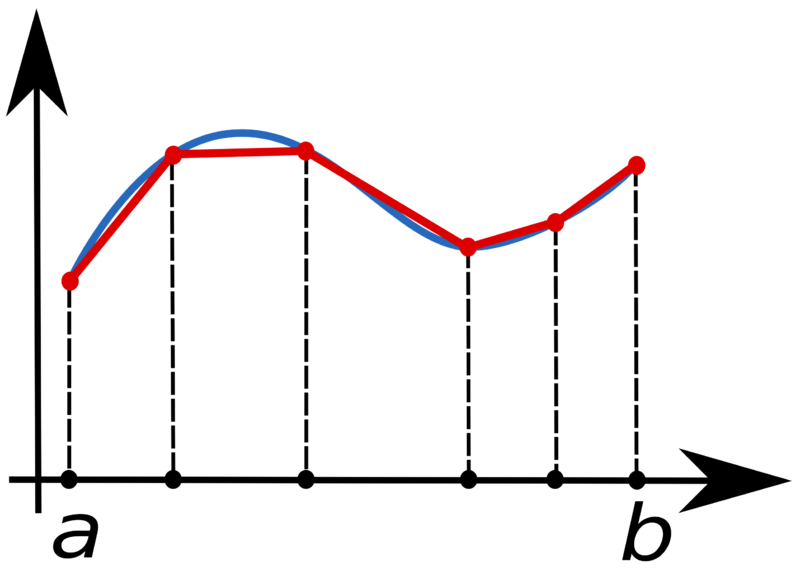

In [4]:
Image(filename="pictures/Composite_trapezoidal_rule_illustration.png", width=500)

##### https://de.wikipedia.org/wiki/Trapezregel